# 5. Logistic Classification

$H(x) = \frac{1}{1+e^-W^Tx} 편향이 존재안하면\\$
$H(x) = \frac{1}{1+e^-(W^Tx+b)} 편향이 존재하면\\$
x : m개의 데이터 x d차원 feature가 존재할 때 $\\$
W : d x 1 : 각 d차원의 feature마다 가중치W가 존재함 W가 각 feature마다 있다고 (1,d)가 아니라 행렬곱을 위해 (d,1)로 표현!$\\$
우리는 각 m개의 데이터마다 0/1로 binary classification를 수행할 거임 => |x*$W| = (m,d) X (d,1) = (m,1)의 결과가 나옴$\\$
$\\W^Tx$ : (m,1)의 matrix가 나오는데, 이를 시그모이드 함수 $\frac{1}{1+e^-x}$에 적용시키면 [0,1]사이의 확률값이 나옴 = P(x=1) = 1-P(x=0)

-오즈(odds) $\\$
odds = $\frac{p}{1-p}$ // 성공확률p가 실패확률1-p보다 몇 배 높은가 [0,$\displaystyle\infin$]$\\$

-로짓 변환(오즈에 로그를 취한 함수)$\\$
logit(p) = $log\frac{p}{1-p}$ // [-$\displaystyle\infin$,$\displaystyle\infin$] $\\$

-로지스틱 함수($\frac{p}{1-p}$ = $e^a$을 치환해서 계산)$\\$
$H(x) = \frac{1}{1+e^-x}$ // [0,1]사이의 값이 주어지므로 종속변수y<0.5이면 0으로 y>0.5이면 1로 판단한다


### 그렇다면 손실함수는 어떻게 계산되는것인가
-우리가 가중치W를 손실함수가 적은방향으로 찾는데, y=1에 대해서는 높은 확률로 추정하고 y=0에 대해서는 낮은 확률로 추정하는 모델의 W를 찾는다
그러기 위해서는 y=1일 때, y=0일 때 두가지를 나눠서 손실함수를 계산한다 $\\$
c(W) = -log(p)   $\quad$ // y=1일 때, 그래프를 보시다시피 h가 1에 가까울수록(정답이니까) cost가 낮아지고, h가 0에 가까울수록(정답이랑 멀어짐) cost가 높아짐$\\$
       $\quad\quad\;\;\;$-log(1-p) // y=0일 때, 그래프를 보시다시피 h가 1에 가까울수록(정답이랑 멀어짐) cost가 높아지고, h가 0에 가까울수록(정답이니까) cost가 낮아짐

$\\\\$
이렇게 y=0 or 1일 때 나눠서 손실함수 계산한것을 합치면 $\\$
C(W) = $-\frac{1}{m}\sum{ylog(H(x)) + (1-y)(log(1-H(x)))}$ $\\$
y=1일 때는 -log(H(x))만 손실함수로 표현하므로 오른쪽것을 제거하고 $\\$
y=0일 때는 (1-y)(log(1-H(x)))만 손실함수로 표현하므로 왼쪽것을 제거함

C:\Users\GunHee\AppData\Local\Temp\ipykernel_12796\1431336881.py:5: RuntimeWarning: divide by zero encountered in log
  c1 = -np.log(h1)


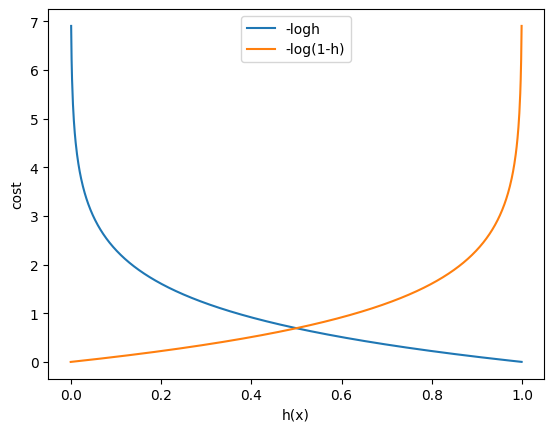

In [1]:
import matplotlib.pyplot as plt
import numpy as np

h1 = np.arange(0,1,0.001)
c1 = -np.log(h1)
plt.plot(h1,c1)

h2 = np.arange(0,1,0.001)
c2 = -np.log(1-h2)
plt.plot(h2,c2)

plt.xlabel("h(x)")
plt.ylabel("cost")

plt.legend(["-logh","-log(1-h)"])
plt.show()

### 실제로 W를 수정하는 작업

W = W - lr*$\frac{d}{dW}cost(W)$

In [2]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

Logistic Regression를 계산하는 작업 $\\$
Hypothesis = $\frac{1}{1+e^-W^Tx}$

In [3]:
#6x2 6개의 데이터 2개의 feature가 있음 => 0or1로 분류해준 6개의 label
x_train = torch.FloatTensor([ [1,2], [2,3] , [3,1] , [4,3] , [5,3] , [6,2] ])
y_train = torch.FloatTensor([ [0] , [0] , [0] , [1] , [1] , [1] ])
x_train.shape, y_train.shape

(torch.Size([6, 2]), torch.Size([6, 1]))

In [4]:
torch.exp(torch.FloatTensor([1]))

tensor([2.7183])

In [5]:
#각 feature마다 가중치를 0으로 초기화
W = torch.zeros((2,1) , requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [6]:
#초기 W,b가 0이므로 예측값모두 0.5로 나옴\
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W)+b)))
hypothesis

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)

In [7]:
#sigmoid드 함수를 적용하면 1/1+e^-x에 x에 Wx+b를 대입해서 계산해줌
torch.sigmoid(x_train.matmul(W)+b)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)

Cost를 계산하는 작업

Cost(W) = $-\frac{1}{m}\sum{ylog(H(x)) + (1-y)(log(1-H(x)))}$ $\\$

In [8]:
hypothesis, y_train

(tensor([[0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000],
         [0.5000]], grad_fn=<MulBackward0>),
 tensor([[0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.]]))

In [9]:
- ( y_train[0] * torch.log(hypothesis[0]) + (1-y_train[0])*torch.log(1-hypothesis[0]) )

tensor([0.6931], grad_fn=<NegBackward0>)

In [10]:
loss = - ( y_train * torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis) )
loss

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)

In [11]:
cost = loss.mean()
cost

tensor(0.6931, grad_fn=<MeanBackward0>)

In [12]:
#이진 크로스 엔트로피 함수를 이용하면 cost를 바로 계산할 수 있음
#hypotesis = 1/1+e^-x만 계산해주면
#알아서 log랑 sigmoid를 취해서 y_train과 비교후 cost를 계산해줌
F.binary_cross_entropy(hypothesis,y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

위에서 구한 Hypothesis와 cost를 이용 + 경사하강법 => Logisitic Regression에 적합한 W,b를 찾기

In [13]:
x_train, y_train

(tensor([[1., 2.],
         [2., 3.],
         [3., 1.],
         [4., 3.],
         [5., 3.],
         [6., 2.]]),
 tensor([[0.],
         [0.],
         [0.],
         [1.],
         [1.],
         [1.]]))

In [14]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=1)

nb_epoch = 1000

for epoch in range(nb_epoch+1):
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)

    #직접 공식을 이용해서 손실함수 계산
    loss = -(y_train*torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis) )
    cost = loss.mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100==0:
        print("Epoch : {:4d} /{} Cost : {:6f}".format(epoch, nb_epoch, cost.item()))

Epoch :    0 /1000 Cost : 0.693147
Epoch :  100 /1000 Cost : 0.134722
Epoch :  200 /1000 Cost : 0.080643
Epoch :  300 /1000 Cost : 0.057900
Epoch :  400 /1000 Cost : 0.045300
Epoch :  500 /1000 Cost : 0.037261
Epoch :  600 /1000 Cost : 0.031673
Epoch :  700 /1000 Cost : 0.027556
Epoch :  800 /1000 Cost : 0.024394
Epoch :  900 /1000 Cost : 0.021888
Epoch : 1000 /1000 Cost : 0.019852


In [15]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=1)

nb_epoch = 1000

for epoch in range(nb_epoch+1):
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)

    #이진 크로스 엔트로피를 이용해서 손실함수 계산
    cost = F.binary_cross_entropy(hypothesis,y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100==0:
        print("Epoch : {:4d} /{} Cost : {:6f}".format(epoch, nb_epoch, cost.item()))

Epoch :    0 /1000 Cost : 0.693147
Epoch :  100 /1000 Cost : 0.134722
Epoch :  200 /1000 Cost : 0.080643
Epoch :  300 /1000 Cost : 0.057900
Epoch :  400 /1000 Cost : 0.045300
Epoch :  500 /1000 Cost : 0.037261
Epoch :  600 /1000 Cost : 0.031672
Epoch :  700 /1000 Cost : 0.027556
Epoch :  800 /1000 Cost : 0.024394
Epoch :  900 /1000 Cost : 0.021888
Epoch : 1000 /1000 Cost : 0.019852


위에서 만든 원리를 이용해서 실제 데이터에 적용하기

In [16]:
#Real data로 불러오기
#m개의 데이터 X 8개의 feature가 존재함 => m개의 데이터를 0or1로 분류하는 작업
xy = np.loadtxt('https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
x_train[:5], y_train[:5]

(tensor([[-0.2941,  0.4874,  0.1803, -0.2929,  0.0000,  0.0015, -0.5312, -0.0333],
         [-0.8824, -0.1457,  0.0820, -0.4141,  0.0000, -0.2072, -0.7669, -0.6667],
         [-0.0588,  0.8392,  0.0492,  0.0000,  0.0000, -0.3055, -0.4927, -0.6333],
         [-0.8824, -0.1055,  0.0820, -0.5354, -0.7778, -0.1624, -0.9240,  0.0000],
         [ 0.0000,  0.3769, -0.3443, -0.2929, -0.6028,  0.2846,  0.8873, -0.6000]]),
 tensor([[0.],
         [1.],
         [0.],
         [1.],
         [0.]]))

In [17]:
#featurer 8개이므로 각 feature의 가중치를 0으로 설정해줌
W = torch.zeros((8,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b] , lr=1)

nb_epochs = 100

for epoch in range(nb_epochs+1):
    hypothesis = torch.sigmoid(x_train.matmul(W)+b)
    
    lost = -(y_train*torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis))
    cost = lost.mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:
        #W,b가 경사하강법을 거치면서 점차 손실함수가 적어지는 방향으로 수정중
        #print("W=",W, " b = ",b)
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/100 Cost: 0.693147
Epoch   10/100 Cost: 0.572727
Epoch   20/100 Cost: 0.539493
Epoch   30/100 Cost: 0.519708
Epoch   40/100 Cost: 0.507066
Epoch   50/100 Cost: 0.498539
Epoch   60/100 Cost: 0.492549
Epoch   70/100 Cost: 0.488209
Epoch   80/100 Cost: 0.484985
Epoch   90/100 Cost: 0.482543
Epoch  100/100 Cost: 0.480661


In [18]:
#featurer 8개이므로 각 feature의 가중치를 0으로 설정해줌
W = torch.zeros((8,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b] , lr=1)

nb_epochs = 100

for epoch in range(nb_epochs+1):
    hypothesis = torch.sigmoid(x_train.matmul(W)+b)
    
    cost = F.binary_cross_entropy(hypothesis,y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/100 Cost: 0.693147
Epoch   10/100 Cost: 0.572727
Epoch   20/100 Cost: 0.539493
Epoch   30/100 Cost: 0.519708
Epoch   40/100 Cost: 0.507066
Epoch   50/100 Cost: 0.498539
Epoch   60/100 Cost: 0.492549
Epoch   70/100 Cost: 0.488209
Epoch   80/100 Cost: 0.484985
Epoch   90/100 Cost: 0.482543
Epoch  100/100 Cost: 0.480661


수동으로 로지스틱 회귀를 적용한 후 모델의 정확도 성능을 평가

In [19]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
hypothesis[:5]

tensor([[0.4103],
        [0.9242],
        [0.2300],
        [0.9411],
        [0.1772]], grad_fn=<SliceBackward0>)

In [20]:
prediction = hypothesis>0.5
prediction[:5]

tensor([[False],
        [ True],
        [False],
        [ True],
        [False]])

In [21]:
y_train[:5]

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.]])

In [22]:
correct_prediction = prediction==y_train
correct_prediction[:7]

tensor([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False]])

In [23]:
accuracy = correct_prediction.sum() / len(correct_prediction)
accuracy

tensor(0.7668)

모듈(nn.Module)를 이용해서 로지스틱회귀모델 만들기

In [24]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        #self.linear = {W,b}를 설정하는 작업으로 
        #m=?, d=8, W=8x1, b=1 
        self.linear = nn.Linear(8,1) 

        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [25]:
model = BinaryClassifier()
model

BinaryClassifier(
  (linear): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [26]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1822, -0.1561, -0.0685,  0.1659, -0.3328,  0.2120, -0.0727,  0.1799]],
        requires_grad=True),
 Parameter containing:
 tensor([0.0491], requires_grad=True)]

In [27]:
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epoch=100

for epoch in range(nb_epoch+1):
    hypothesis = model(x_train)

    cost = F.binary_cross_entropy(hypothesis,y_train)
   
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%10==0:
        #model이 SGD를 이용해서 학습하면서 W,b를 갱신함
        #print(list(model.parameters()))
        
        prediction = hypothesis>=0.5
        correct_prediction = prediction==y_train
        accuracy = correct_prediction.sum() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( epoch, nb_epochs, cost.item(), accuracy * 100, ))


Epoch    0/100 Cost: 0.704829 Accuracy 45.72%
Epoch   10/100 Cost: 0.572392 Accuracy 67.59%
Epoch   20/100 Cost: 0.539564 Accuracy 73.25%
Epoch   30/100 Cost: 0.520041 Accuracy 75.89%
Epoch   40/100 Cost: 0.507561 Accuracy 76.15%
Epoch   50/100 Cost: 0.499125 Accuracy 76.42%
Epoch   60/100 Cost: 0.493177 Accuracy 77.21%
Epoch   70/100 Cost: 0.488846 Accuracy 76.81%
Epoch   80/100 Cost: 0.485612 Accuracy 76.28%
Epoch   90/100 Cost: 0.483146 Accuracy 76.55%
Epoch  100/100 Cost: 0.481234 Accuracy 76.81%
